<a href="https://colab.research.google.com/github/Donalizasaji/LAB/blob/main/LAB%20TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/2015.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [72]:
df.shape

(158, 13)

In [ ]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [64]:
bin_edges=[0,2,5,8]
bin_labels=['Low Happiness','Medium Happiness','High Happiness']
df['Happiness']=pd.cut(df['Happiness Score'], bins=bin_edges, labels=bin_labels)
print(df.head())



       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [ ]:
encoded_data=pd.get_dummies (df,columns=['Region'])

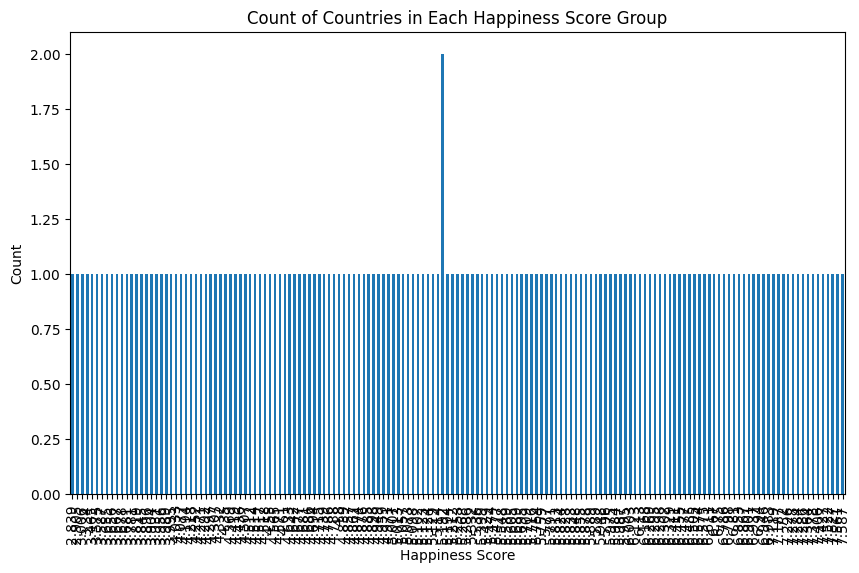

In [65]:
plt.figure(figsize=(10, 6))
df['Happiness Score'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Countries in Each Happiness Score Group')
plt.xlabel('Happiness Score')
plt.ylabel('Count')
plt.show()


In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['Economy (GDP per Capita)'] = scaler.fit_transform(df[['Economy (GDP per Capita)']])


In [68]:

import scipy.stats as stats
contingency_table = pd.crosstab(df['Region'], df['Happiness Rank'])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
alpha = 0.05
if p <= alpha:
    print("There is a significant association between Region and Happiness Rank.")
else:
    print("There is no significant association between Region and Happiness Rank.")


There is no significant association between Region and Happiness Rank.


<Axes: >

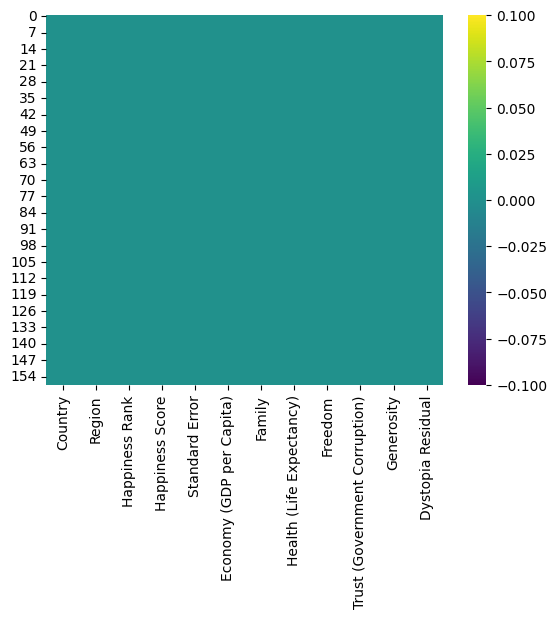

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')

                          Economy (GDP per Capita)    Family  \
Economy (GDP per Capita)                  1.006369  0.176318   
Family                                    0.176318  0.074185   
Health (Life Expectancy)                  0.202375  0.035741   

                          Health (Life Expectancy)  
Economy (GDP per Capita)                  0.202375  
Family                                    0.035741  
Health (Life Expectancy)                  0.061047  


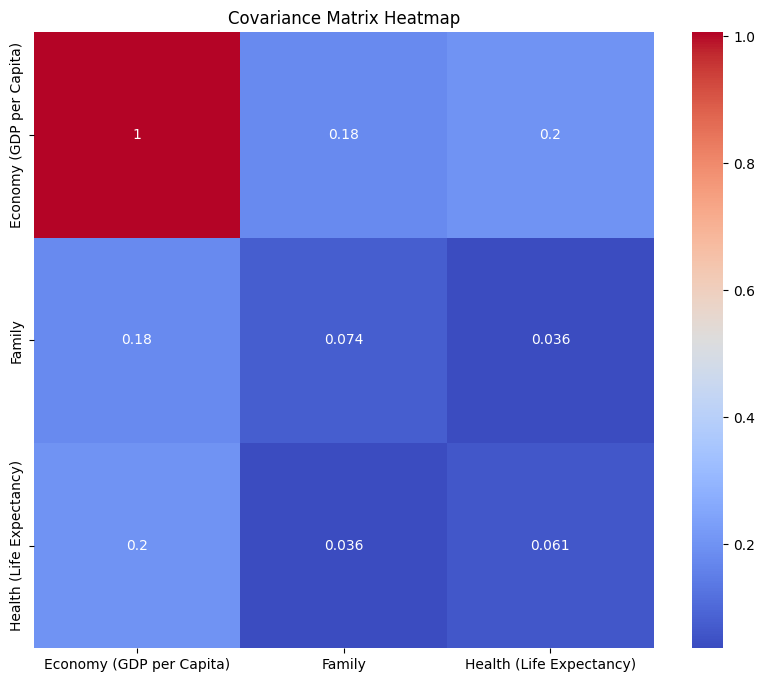

In [70]:
subset_columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']
cov_matrix = df[subset_columns].cov()
print(cov_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix Heatmap')
plt.show()

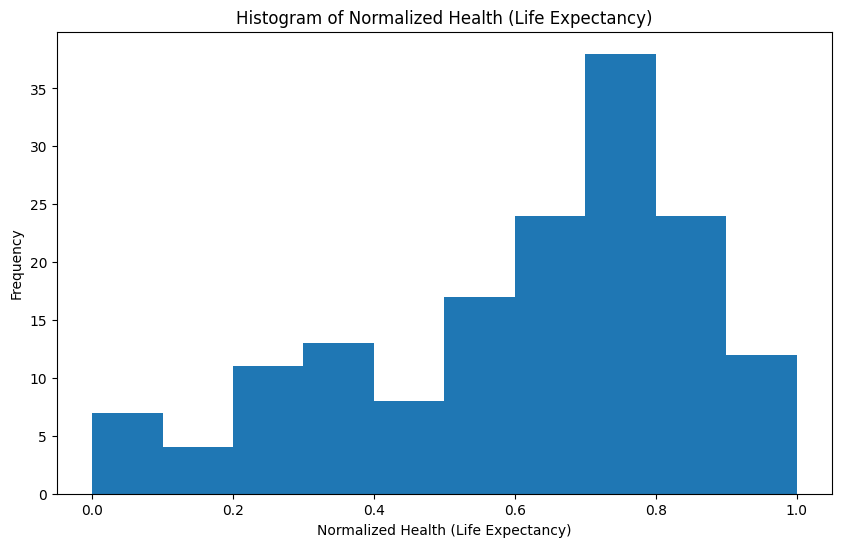

In [71]:

normalized_health = (df['Health (Life Expectancy)'] - df['Health (Life Expectancy)'].min()) / (df['Health (Life Expectancy)'].max() - df['Health (Life Expectancy)'].min())

plt.figure(figsize=(10, 6))
plt.hist(normalized_health, bins=10)
plt.title('Histogram of Normalized Health (Life Expectancy)')
plt.xlabel('Normalized Health (Life Expectancy)')
plt.ylabel('Frequency')


plt.show()